In [55]:
import pandas as pd
import numpy as np
import warnings
from ipywidgets import *



In [56]:
warnings.filterwarnings('ignore') 

In [57]:
columns_names =["user_id","item_id","rating","timestamp"]

In [9]:

df=pd.read_csv(r"C:\Users\Acer\Downloads\ml-100k\u.data",sep='\t',names=columns_names)



In [10]:
df.head()

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [11]:
df.shape

(100000, 4)

In [12]:
df['user_id'].nunique()

943

In [13]:
df['item_id'].nunique()

1682

In [14]:
movies_titles = pd.read_csv("C:/Users/Acer/Downloads/ml-100k/u.item", sep='\|', header=None,encoding='ISO-8859-1')

In [15]:
movies_titles.shape

(1682, 24)

In [16]:
movies_titles.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [17]:
movies_titles=movies_titles[[0,1]]

In [18]:
movies_titles

,0,1
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)
...,...,...
1677,1678,Mat' i syn (1997)
1678,1679,B. Monkey (1998)
1679,1680,Sliding Doors (1998)
1680,1681,You So Crazy (1994)


In [19]:
movies_titles.columns=['item_id','title']

In [20]:
movies_titles

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)
...,...,...
1677,1678,Mat' i syn (1997)
1678,1679,B. Monkey (1998)
1679,1680,Sliding Doors (1998)
1680,1681,You So Crazy (1994)


In [21]:
df=pd.merge(df, movies_titles, on='item_id')


In [22]:
## Exploratory data Analysis

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
df.groupby('title').mean()['rating'].sort_values(ascending=False)

title
They Made Me a Criminal (1939)                  5.0
Marlene Dietrich: Shadow and Light (1996)       5.0
Saint of Fort Washington, The (1993)            5.0
Someone Else's America (1995)                   5.0
Star Kid (1997)                                 5.0
                                               ... 
Eye of Vichy, The (Oeil de Vichy, L') (1993)    1.0
King of New York (1990)                         1.0
Touki Bouki (Journey of the Hyena) (1973)       1.0
Bloody Child, The (1996)                        1.0
Crude Oasis, The (1995)                         1.0
Name: rating, Length: 1664, dtype: float64

In [25]:
df.groupby('title').count()['rating'].sort_values(ascending=False)

title
Star Wars (1977)                      583
Contact (1997)                        509
Fargo (1996)                          508
Return of the Jedi (1983)             507
Liar Liar (1997)                      485
                                     ... 
Great Day in Harlem, A (1994)           1
Other Voices, Other Rooms (1997)        1
Good Morning (1971)                     1
Girls Town (1996)                       1
Á köldum klaka (Cold Fever) (1994)      1
Name: rating, Length: 1664, dtype: int64

In [26]:
ratings=pd.DataFrame(df.groupby('title').mean()['rating'])

In [27]:
ratings.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [28]:
ratings['num of ratings']=pd.DataFrame(df.groupby('title').count()['rating'])

In [29]:
ratings.head()

,rating,num of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


In [30]:
ratings.sort_values(by="rating",ascending=False)

,rating,num of ratings
title,,
They Made Me a Criminal (1939),5.0,1
Marlene Dietrich: Shadow and Light (1996),5.0,1
"Saint of Fort Washington, The (1993)",5.0,2
Someone Else's America (1995),5.0,1
Star Kid (1997),5.0,3
...,...,...
"Eye of Vichy, The (Oeil de Vichy, L') (1993)",1.0,1
King of New York (1990),1.0,1
Touki Bouki (Journey of the Hyena) (1973),1.0,1


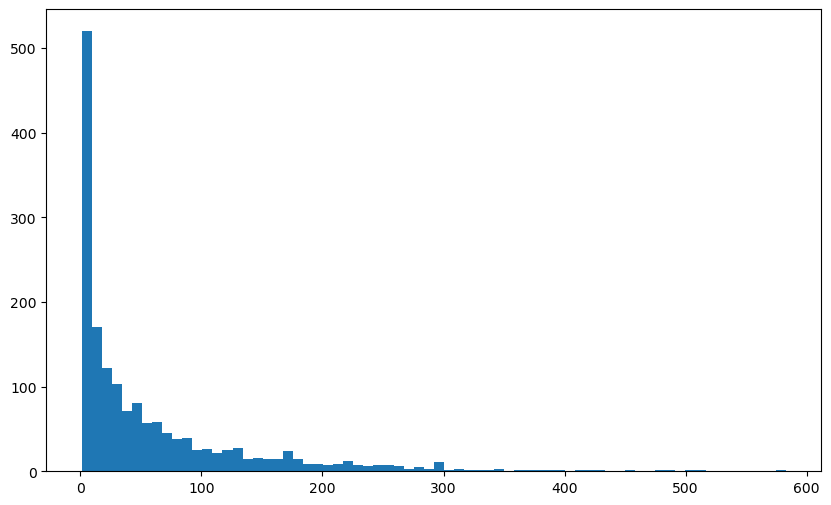

In [31]:
plt.figure(figsize=(10,6))
plt.hist(ratings['num of ratings'], bins= 70)
plt.show()

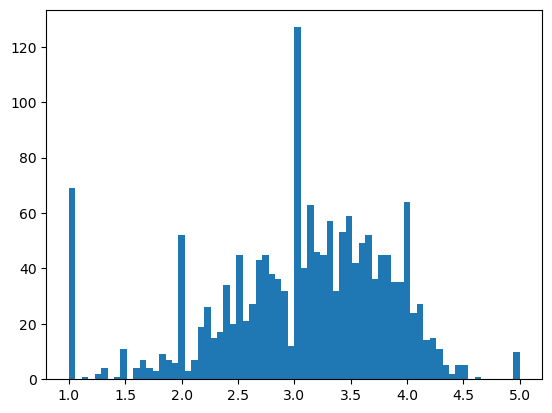

In [32]:
plt.hist(ratings['rating'], bins=70)
plt.show()

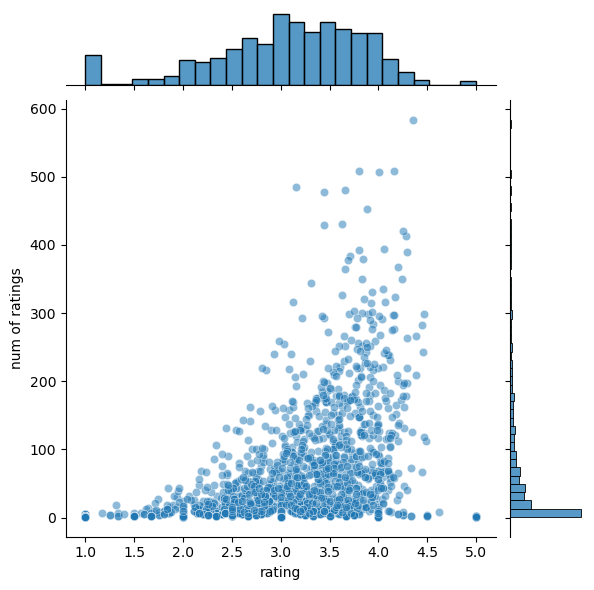

In [33]:
sns.jointplot(x='rating',y='num of ratings',data=ratings,alpha=0.5)

# Creating Movie Recommendation


In [34]:
df.head()

,user_id,item_id,rating,timestamp,title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)


In [35]:
moviematrix=df.pivot_table(index='user_id',columns='title',values="rating")

In [36]:
moviematrix

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
ratings.sort_values('num of ratings',ascending=False).head()

,rating,num of ratings
title,,
Star Wars (1977),4.358491,583
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485


In [38]:
starwars_user_ratings=moviematrix['Star Wars (1977)']
starwars_user_ratings.head()

user_id
1    5.0
2    5.0
3    NaN
4    5.0
5    4.0
Name: Star Wars (1977), dtype: float64

In [39]:
ratings.sort_values('num of ratings', ascending = False).head(10)

,rating,num of ratings
title,,
Star Wars (1977),4.358491,583
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
"English Patient, The (1996)",3.656965,481
Scream (1996),3.441423,478
Toy Story (1995),3.878319,452
Air Force One (1997),3.631090,431


In [40]:
for i in ratings.index:
    movieUserRatings = moviematrix[i]
    similarToThatMovie = moviematrix.corrwith(movieUserRatings)
    corr_toMovie = pd.DataFrame(similarToThatMovie, columns = ['Correlation'])
    corr_toMovie.dropna(inplace = True)
    corr_toMovie = corr_toMovie.join(ratings['num of ratings'])
    result = corr_toMovie[corr_toMovie['num of ratings'] > 100].sort_values('Correlation', ascending = False).head()
    if result['num of ratings'].count() >= 5:
        print(i)
        ratings.loc[i, 'FirstMovieRecommendation'] = result.iloc[1:2].index.values[0]
        ratings.loc[i, 'SecondMovieRecommendation'] = result.iloc[2:3].index.values[0]
        ratings.loc[i, 'ThirdMovieRecommendation'] = result.iloc[3:4].index.values[0]
        ratings.loc[i, 'FourthMovieRecommendation'] = result.iloc[4:5].index.values[0]

'Til There Was You (1997)
1-900 (1994)
101 Dalmatians (1996)
12 Angry Men (1957)
187 (1997)
2 Days in the Valley (1996)
20,000 Leagues Under the Sea (1954)
2001: A Space Odyssey (1968)
39 Steps, The (1935)
8 1/2 (1963)
8 Heads in a Duffel Bag (1997)
8 Seconds (1994)
A Chef in Love (1996)
Above the Rim (1994)
Absolute Power (1997)
Abyss, The (1989)
Ace Ventura: Pet Detective (1994)
Ace Ventura: When Nature Calls (1995)
Across the Sea of Time (1995)
Addams Family Values (1993)
Addicted to Love (1997)
Addiction, The (1995)
Adventures of Pinocchio, The (1996)
Adventures of Priscilla, Queen of the Desert, The (1994)
Adventures of Robin Hood, The (1938)
Affair to Remember, An (1957)
African Queen, The (1951)
Afterglow (1997)
Age of Innocence, The (1993)
Air Bud (1997)
Air Force One (1997)
Air Up There, The (1994)
Airheads (1994)
Akira (1988)
Aladdin (1992)
Aladdin and the King of Thieves (1996)
Alaska (1996)
Albino Alligator (1996)
Alice in Wonderland (1951)
Alien (1979)
Alien 3 (1992)
Alien

In [48]:
ratings = ratings.fillna('-')

In [49]:
ratings.to_csv('MovieRecommendations.csv', encoding='utf-8')

In [50]:
ratings

,rating,num of ratings,FirstMovieRecommendation,SecondMovieRecommendation,ThirdMovieRecommendation,FourthMovieRecommendation
title,,,,,,
'Til There Was You (1997),2.333333,9,"Edge, The (1997)",William Shakespeare's Romeo and Juliet (1996),Star Trek: The Wrath of Khan (1982),Dumbo (1941)
1-900 (1994),2.600000,5,"Full Monty, The (1997)","Crow, The (1994)","Ice Storm, The (1997)",Hoop Dreams (1994)
101 Dalmatians (1996),2.908257,109,Murder at 1600 (1997),Miracle on 34th Street (1994),Being There (1979),"Remains of the Day, The (1993)"
12 Angry Men (1957),4.344000,125,Ulee's Gold (1997),Rear Window (1954),Seven Years in Tibet (1997),Clerks (1994)
187 (1997),3.024390,41,Maverick (1994),Conan the Barbarian (1981),"Magnificent Seven, The (1954)",Cool Hand Luke (1967)
...,...,...,...,...,...,...
Young Guns II (1990),2.772727,44,Cold Comfort Farm (1995),Sense and Sensibility (1995),"Maltese Falcon, The (1941)",Young Guns (1988)
"Young Poisoner's Handbook, The (1995)",3.341463,41,Kiss the Girls (1997),"Peacemaker, The (1997)","Sound of Music, The (1965)","Nightmare Before Christmas, The (1993)"
Zeus and Roxanne (1997),2.166667,6,"Piano, The (1993)","Wizard of Oz, The (1939)","Rainmaker, The (1997)",Forrest Gump (1994)


In [51]:
#Load the dataset saved for reusability from this code block onwards
df_result = pd.read_csv('MovieRecommendations.csv')
df_result.head()

,title,rating,num of ratings,FirstMovieRecommendation,SecondMovieRecommendation,ThirdMovieRecommendation,FourthMovieRecommendation
0,'Til There Was You (1997),2.333333,9,"Edge, The (1997)",William Shakespeare's Romeo and Juliet (1996),Star Trek: The Wrath of Khan (1982),Dumbo (1941)
1,1-900 (1994),2.600000,5,"Full Monty, The (1997)","Crow, The (1994)","Ice Storm, The (1997)",Hoop Dreams (1994)
2,101 Dalmatians (1996),2.908257,109,Murder at 1600 (1997),Miracle on 34th Street (1994),Being There (1979),"Remains of the Day, The (1993)"
3,12 Angry Men (1957),4.344000,125,Ulee's Gold (1997),Rear Window (1954),Seven Years in Tibet (1997),Clerks (1994)
4,187 (1997),3.024390,41,Maverick (1994),Conan the Barbarian (1981),"Magnificent Seven, The (1954)",Cool Hand Luke (1967)


In [52]:
for i in df_result['title']:
    print(i)

'Til There Was You (1997)
1-900 (1994)
101 Dalmatians (1996)
12 Angry Men (1957)
187 (1997)
2 Days in the Valley (1996)
20,000 Leagues Under the Sea (1954)
2001: A Space Odyssey (1968)
3 Ninjas: High Noon At Mega Mountain (1998)
39 Steps, The (1935)
8 1/2 (1963)
8 Heads in a Duffel Bag (1997)
8 Seconds (1994)
A Chef in Love (1996)
Above the Rim (1994)
Absolute Power (1997)
Abyss, The (1989)
Ace Ventura: Pet Detective (1994)
Ace Ventura: When Nature Calls (1995)
Across the Sea of Time (1995)
Addams Family Values (1993)
Addicted to Love (1997)
Addiction, The (1995)
Adventures of Pinocchio, The (1996)
Adventures of Priscilla, Queen of the Desert, The (1994)
Adventures of Robin Hood, The (1938)
Affair to Remember, An (1957)
African Queen, The (1951)
Afterglow (1997)
Age of Innocence, The (1993)
Aiqing wansui (1994)
Air Bud (1997)
Air Force One (1997)
Air Up There, The (1994)
Airheads (1994)
Akira (1988)
Aladdin (1992)
Aladdin and the King of Thieves (1996)
Alaska (1996)
Albino Alligator (1

In [58]:
inputMovieName = widgets.Text()

def getRecommendations(sender):
    searchMovie = inputMovieName.value
    list_result = df_result[df_result['title'] == searchMovie]
    fm = list_result['FirstMovieRecommendation'].values[0]
    sm = list_result['SecondMovieRecommendation'].values[0]
    tm = list_result['ThirdMovieRecommendation'].values[0]
    fourthm = list_result['FourthMovieRecommendation'].values[0]
    finalRecommendationText = '1:' + fm + ' \n2:' + sm + ' \n3:' + tm + ' \n4:' + fourthm
    print('Your Recommendations for the Movie ' + searchMovie + ' are:\n')
    print(finalRecommendationText)

# How to get Recommendations?
Select and Copy any movie from the list of Movie Names above
Add that to the text box below
You will have your Movie Recommendation for that Particular movie :)
Note:- On every run the paste command will keep on appending the current output. To clear the output just run the below cell again.
    

In [60]:
inputMovieName.on_submit(getRecommendations)
inputMovieName

Text(value='')

Your Recommendations for the Movie Star Wars (1977) are:

1:Empire Strikes Back, The (1980) 
2:Return of the Jedi (1983) 
3:Raiders of the Lost Ark (1981) 
4:Austin Powers: International Man of Mystery (1997)
